# 2020-07-15

Going to try to do some analysis of available movies. Pretty aimless at the moment. Just see what I can learn.

In [1]:
# Import public packages.
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi 
from importlib import reload
import pickle
import czifile
%matplotlib inline

# Import my packages.
import sys
sys.path.append('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/bin')
import imagep as imp
reload(imp)
from imagep import viewer, save_pickle, load_pickle, box_spots, read_czi

In [5]:
mv12 = load_pickle('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/results/EVE_D11-12_mv.pkl')
mv13 = load_pickle('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/results/EVE_D11-13_mv.pkl')
mv14 = load_pickle('/Users/MStadler/Bioinformatics/Projects/Zelda/Quarantine_analysis/results/EVE_D11-14_mv.pkl')

Let's see if I can stitch these movies together well. Only took 2 weeks to write this shit...

In [6]:
stitch = imp.stitch_ms2(mv12, mv13)

In [7]:
stitch = imp.stitch_ms2(stitch, mv14)

In [9]:
imp.quickview_ms2(stitch.stack, stitch.spot_data)

interactive(children=(Dropdown(description='Color', index=5, options=('inferno', 'magma', 'cividis', 'gray_r',…

Yes, stitched very effectively. Ok cool. Do we see discontinuities at the focus breaks? Breaks occur between frame 14/15 and 37/38.

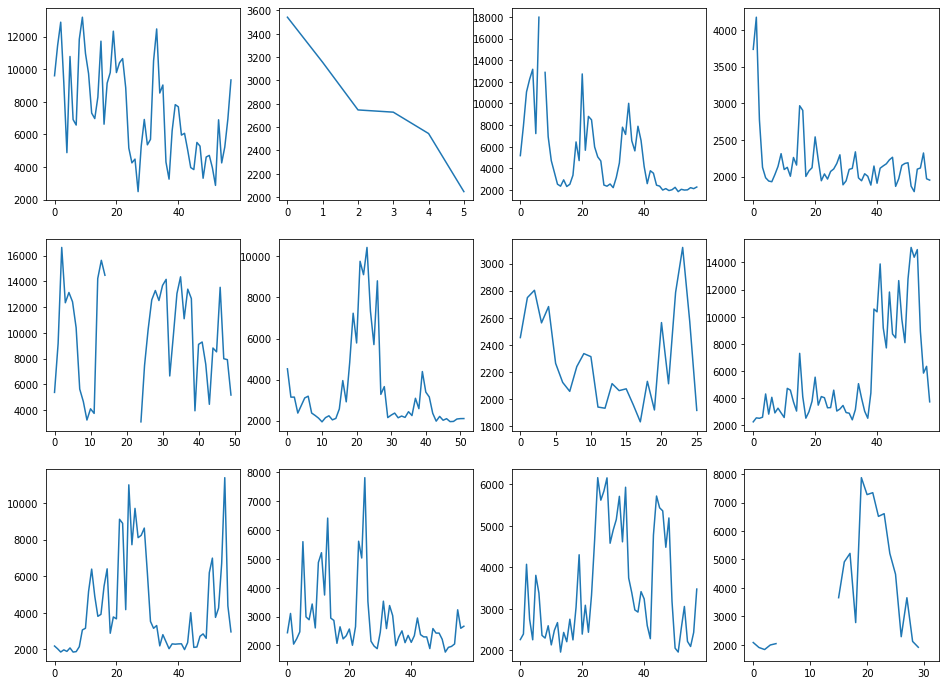

In [18]:
def f(x):
    stitch.intvol[x].plot()
imp.plot_ps(f, range(1,13))

In [20]:
spots = imp.spot_movies(stitch.stack, stitch.spot_data)

interactive(children=(Dropdown(description='Color', index=5, options=('inferno', 'magma', 'cividis', 'gray_r',…

In [21]:
 viewer(spots.mean(axis=2), 'itxy')

interactive(children=(Dropdown(description='Color', index=5, options=('inferno', 'magma', 'cividis', 'gray_r',…

No obvious discontinuities. When doing math later, will need to account for those breaks but for now can just treat them as continuous traces. It looks like mean projections fit the traces much better than max projections (makes sense as these integrated volumes are from sums/means). These longer traces are quite interesting...really clearly show bursting behavior. Let's try some triggered averaging.

Just look for some rises and look at MS2 and protein signal round them:



In [45]:
mv = stitch
events = []
thresh = 3000

for spot in mv.intvol:
    rolling = mv.intvol[spot].rolling(3).mean()
    diff = rolling.diff(3)
    indices = np.where(diff > thresh)
    for i in indices[0]:
        events.append([spot, i])


In [52]:
ms2 = imp.align_traces(mv.intvol, events, 19)
prot = imp.align_traces(mv.prot, events, 19)

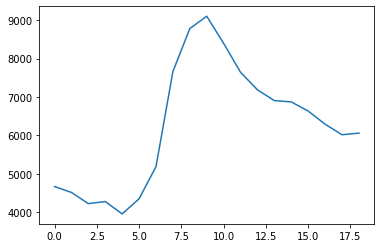

In [53]:
ms2.mean().plot()

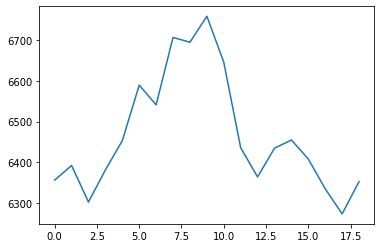

In [54]:
prot.mean().plot()